# SUPERMARKET SALES PREDICTION

**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

**LOADING THE DATASET**

In [11]:
data = pd.read_csv("D:\Sadham Hussain\PROJECTS\Supermarket_Sales_Prediction\supermarket.csv")

In [12]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [13]:
data.head()  #to display the first five output

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [15]:
#shows the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

In [17]:
data.shape  #display how many rows and columns

(1000, 17)

In [18]:
data.dtypes   #display the datatypes of dataset

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [19]:
#Display the columns name in dataset
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [20]:
#Check null value or misssing values
#.sum() checks all the null values in entire rows, when we can't use .SUM ,it shows only top and bottom null values only
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [21]:
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

**EXPLORATORY DATA ANALYSIS**

***HISTOGRAM***

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

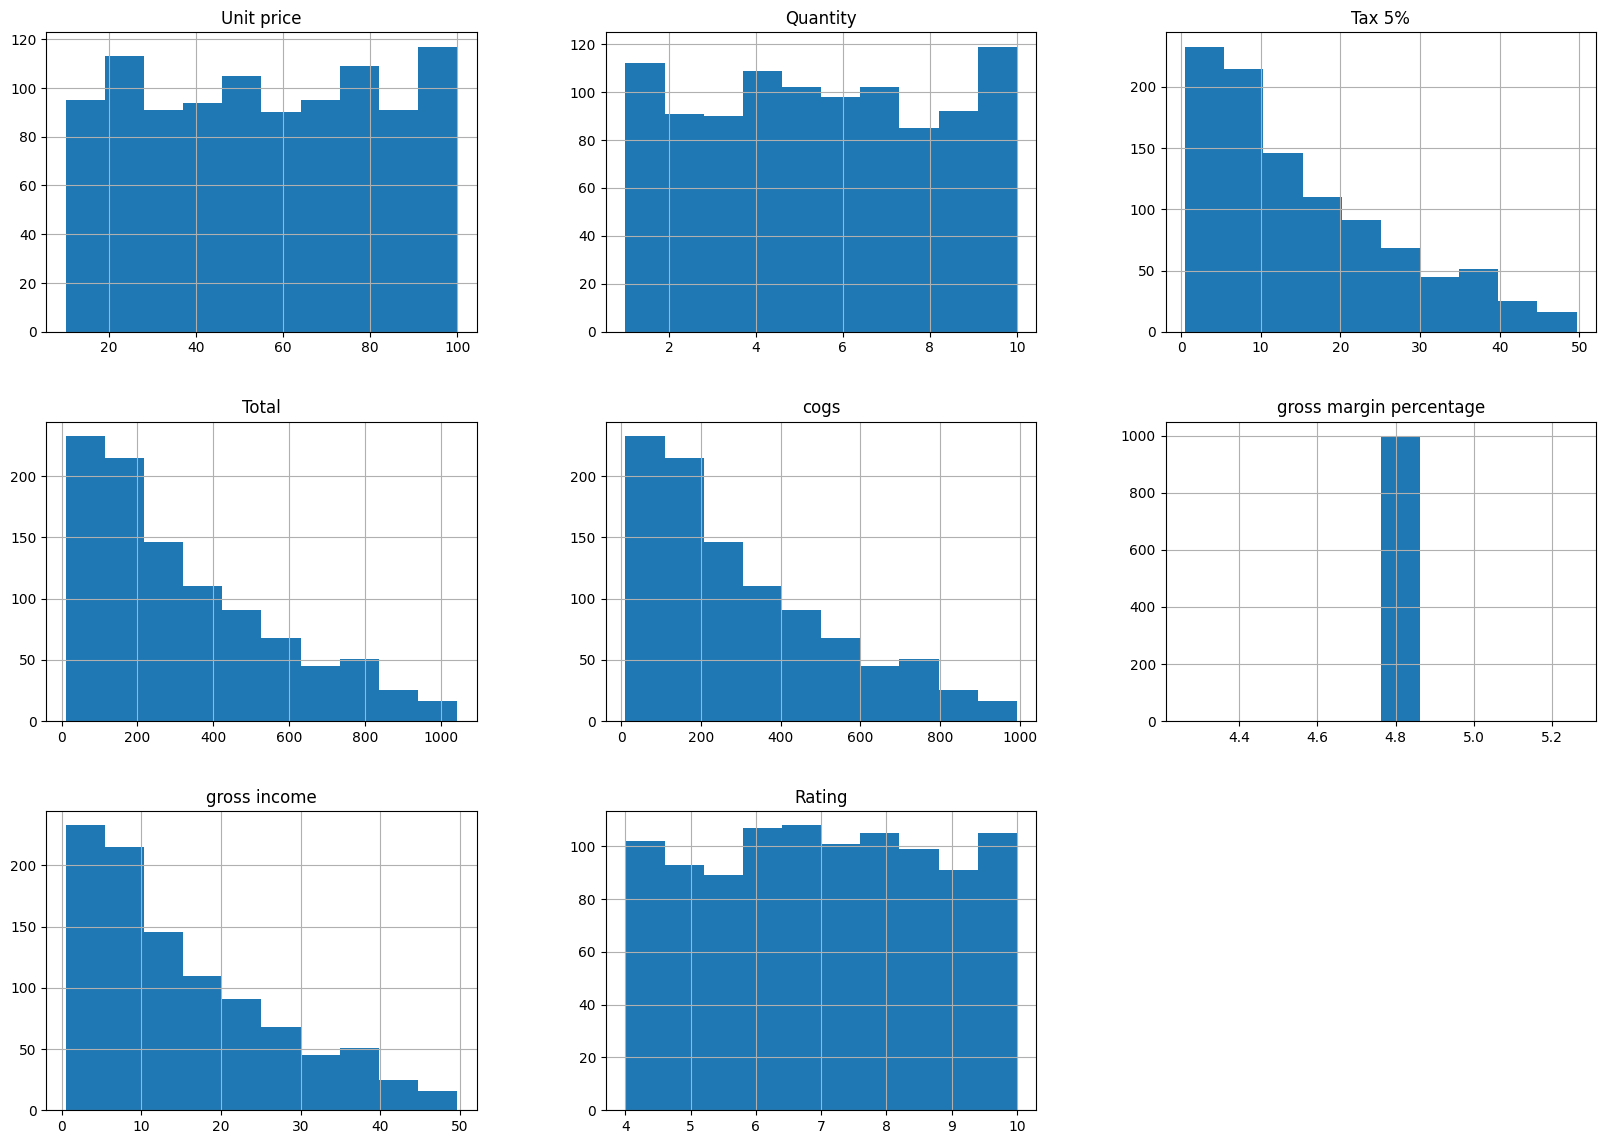

In [25]:
data.hist(figsize=(20,14))
plt.show()

In [27]:
data.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


***HEATMAP***

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.

<Axes: >

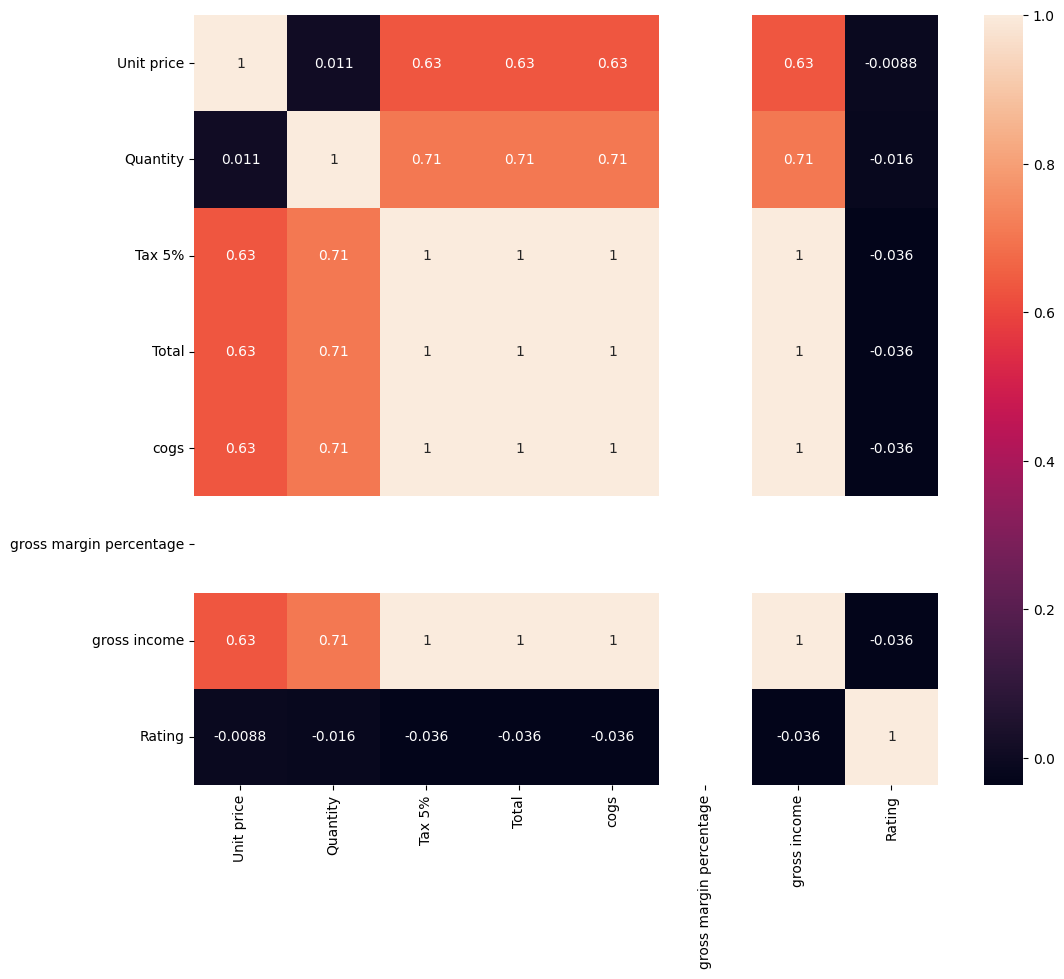

In [29]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(numeric_only=True), annot =True)

In [31]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

***BOXPLOT***

A boxplot, also known as a box-and-whisker plot, is a graphical representation that displays the distribution of a dataset along with its central tendency and variability. It summarizes the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum values of the dataset.

<Axes: xlabel='gross income'>

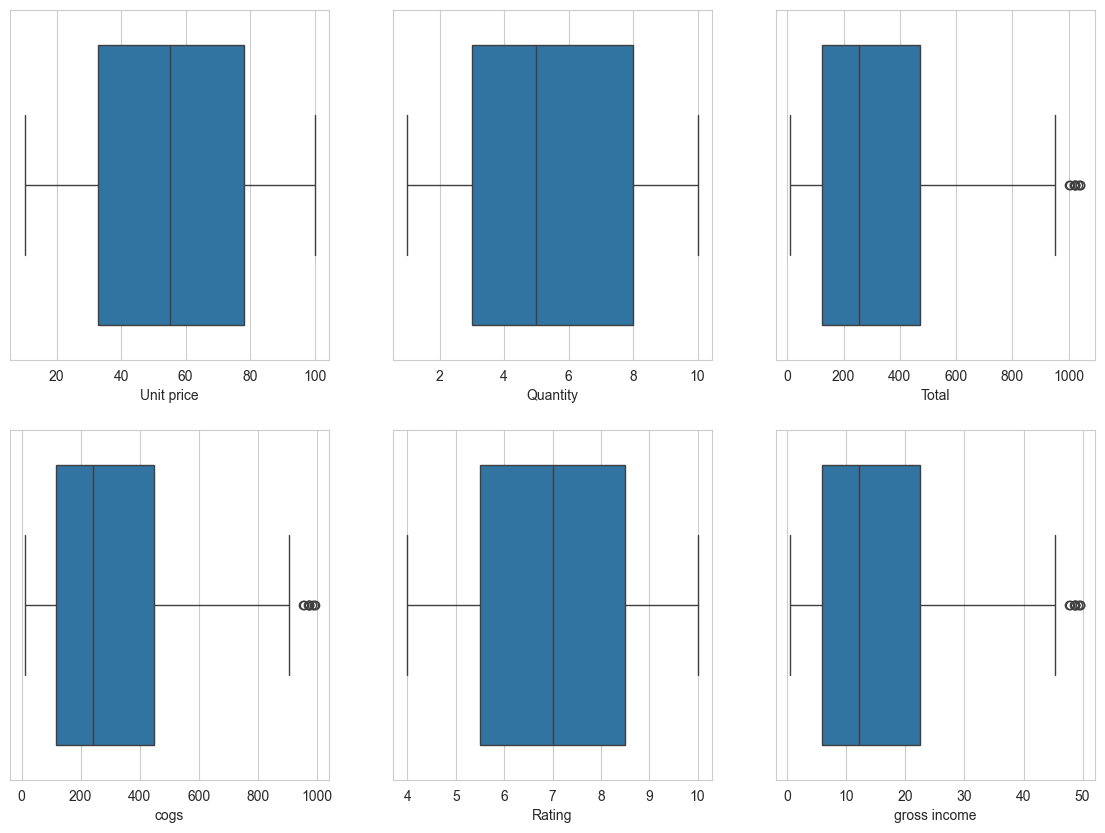

In [32]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

***PAIRPLOT***

A pairplot is a graphical tool used in exploratory data analysis (EDA) to visualize relationships between pairs of variables in a dataset. It is particularly useful for identifying patterns, correlations, and trends among multiple variables simultaneously.

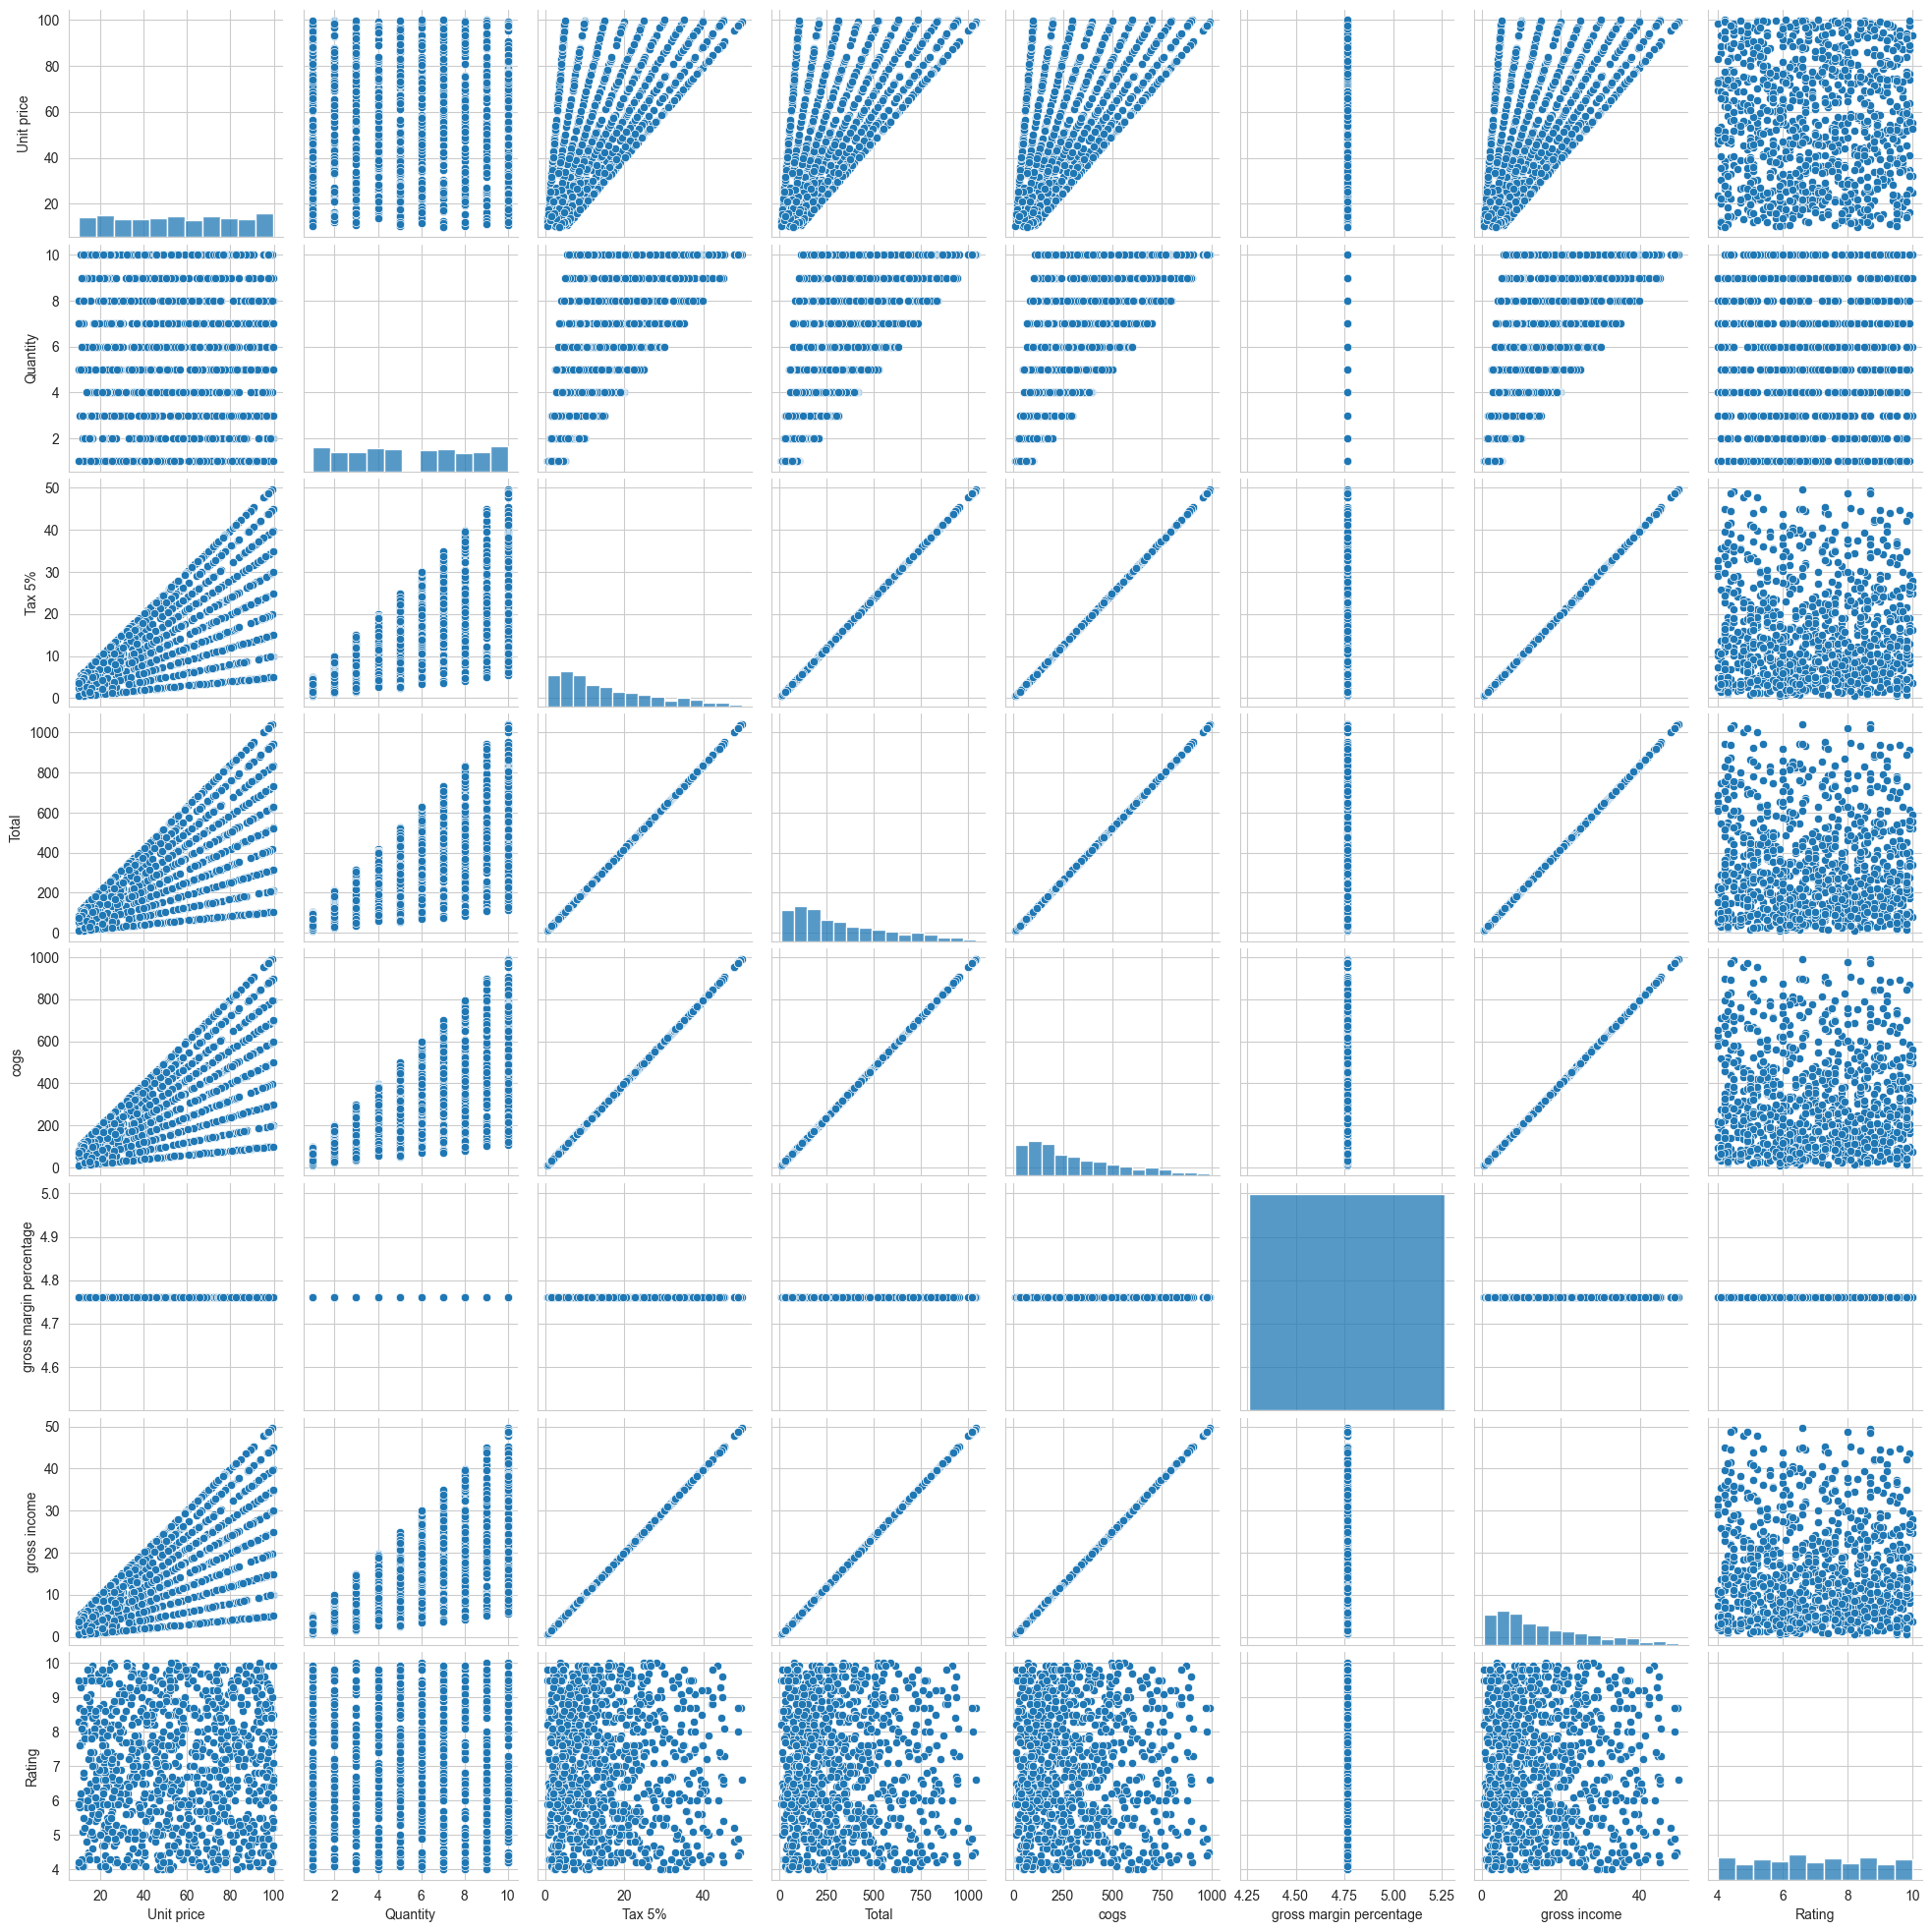

In [33]:
sns.pairplot(data=data)

***REGPLOT***

This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.

<Axes: xlabel='Rating', ylabel='gross income'>

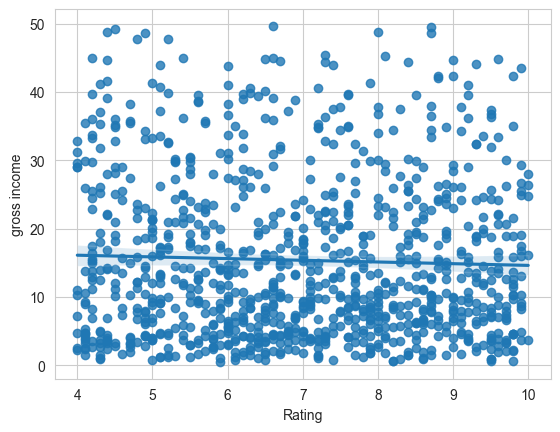

In [34]:
sns.regplot(x='Rating', y= 'gross income', data=data)

***SCATTERPLOT***

A scatterplot is a type of data visualization that displays the relationship between two numerical variables. It represents individual data points as dots on a two-dimensional plane, with one variable plotted on the x-axis and the other variable plotted on the y-axis.

<Axes: xlabel='Rating', ylabel='cogs'>

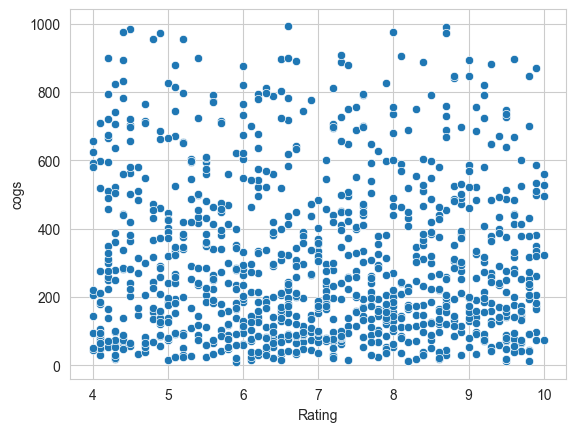

In [35]:
sns.scatterplot(x='Rating', y= 'cogs', data=data)

***JOINTPLOT***

Jointplot is a function provided by the Seaborn library in Python, which is used to create a multi-panel figure that displays the relationship between two variables, along with their univariate distributions. It combines a scatterplot, histograms, and optionally a kernel density estimation (KDE) plot to provide a comprehensive visualization of the data.

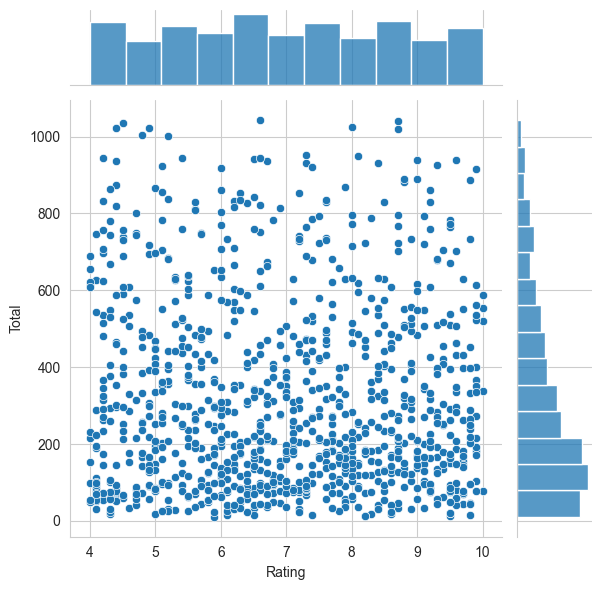

In [36]:
sns.jointplot(x='Rating', y= 'Total', data=data)

***CATPLOT***

Catplot is a function provided by the Seaborn library in Python, primarily used for categorical data visualization. It allows for the creation of different types of categorical plots, such as strip plots, swarm plots, box plots, violin plots, and bar plots, among others.

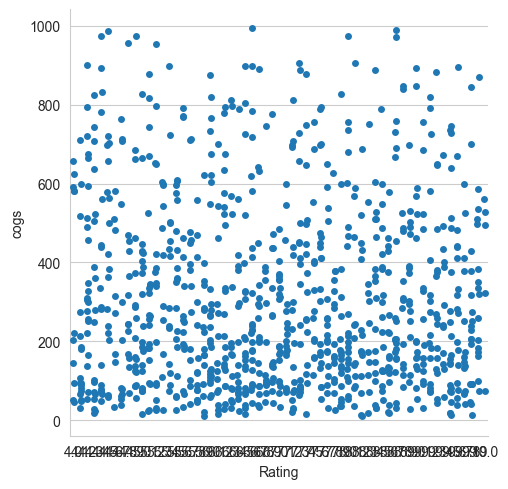

In [37]:
sns.catplot(x='Rating',y='cogs',data=data)

***LMPLOT***

Lmplot is a Seaborn function used for creating linear regression plots, which visualize the relationship between two numerical variables by fitting a linear regression model and displaying the regression line along with scatterplot data points.

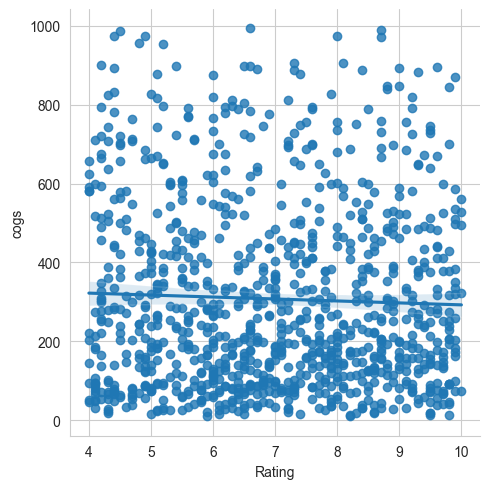

In [38]:
sns.lmplot(x='Rating', y= 'cogs', data=data)

***KDE PLOT (DENSITY PLOT)***

kdeplot is a function provided by the Seaborn library in Python, used to create kernel density estimation (KDE) plots. It visualizes the distribution of a single variable or the joint distribution of two variables as a smoothed density curve. It is commonly used in exploratory data analysis (EDA) and statistical visualization tasks.

<Axes: xlabel='Rating', ylabel='Unit price'>

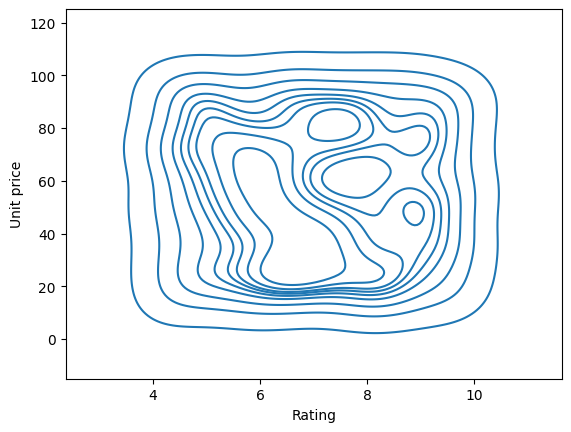

In [39]:
plt.style.use("default")

sns.kdeplot(x='Rating', y= 'Unit price', data=data)

***LINE PLOT***

Lineplot is a function provided by the Seaborn library in Python, used to create line plots. It visualizes the relationship between two numerical variables or one numerical variable against a sequential variable, such as time or index.

<Axes: xlabel='Rating', ylabel='Unit price'>

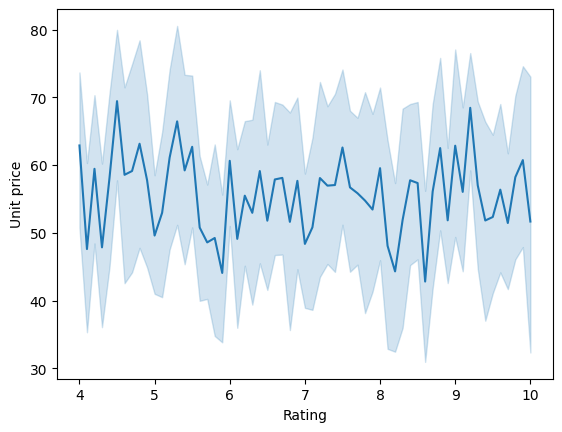

In [40]:
sns.lineplot(x='Rating', y= 'Unit price', data=data)

***BAR PLOT***

Barplot is a function provided by the Seaborn library in Python, used to create bar plots. It visualizes the distribution of a categorical variable by displaying the mean or another summary statistic of a numerical variable for each category.

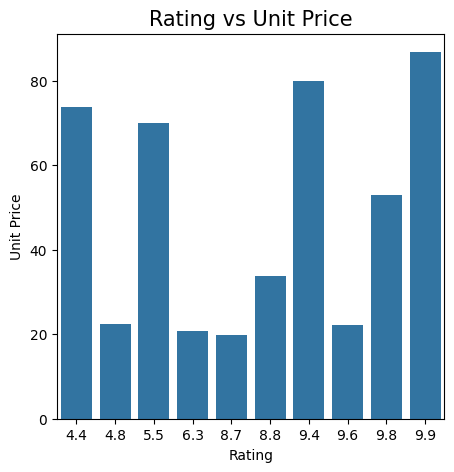

In [41]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=data[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

In [42]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

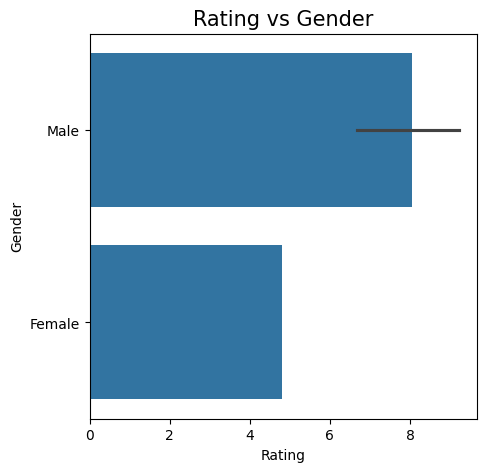

In [43]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=data[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

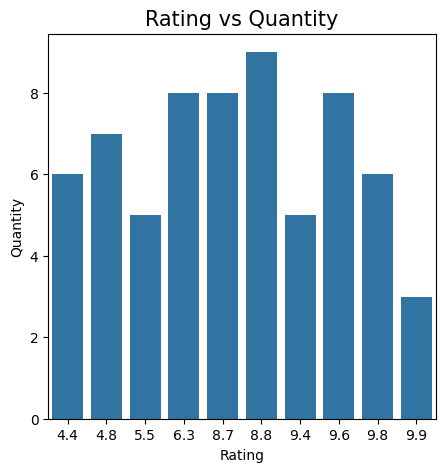

In [44]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=data[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [45]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [46]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [50]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [51]:
y=data['Gender']  #label or outcome
x=data.drop('Gender',axis=1)   #data

**TRAINING AND TESTING DATA**

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
#test data randomly divide 0.2 shows 20% and saved in xtest and ytest and 
#80% of data go to train such as xtrain and ytrain are saved here

In [53]:
print(len(x_train))  #randomly take data and  stored/ show in x_train - trained data
print(len(x_test))   #similarly x_test data store in x_test
print(len(y_train))  #x_train data output stored/ show in y_train
print(len(y_test))   ##similarly output of x_test data store in y_test

800
200
800
200


In [54]:
x_train.shape  #among 1000 data it take 80% for train and 20% for test

(800, 16)

In [55]:
y_train.head() #randomly  shows the first 5 rows of training data

687    1
500    1
332    1
979    0
817    1
Name: Gender, dtype: int32

**MODELS**

***KNEIGHBORS CLASSIFIER***

KNeighborsClassifier is a machine learning algorithm used for classification tasks, predicting the class of new data points based on the majority class of their nearest neighbors. It's widely employed for pattern recognition, image classification, and recommendation systems, though sensitivity to distance metrics and neighbor count requires careful parameter tuning.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       100
           1       0.47      0.45      0.46       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[49 51]
 [55 45]]
Training Score:
 64.75


***SVC (Support Vector Classifier)***

SVC (Support Vector Classifier) is a supervised learning algorithm used for classification tasks, separating data points into different classes with a hyperplane. Widely used for its effectiveness in high-dimensional spaces and flexibility in defining decision boundaries, it requires careful tuning of parameters such as the kernel type and regularization parameter.


In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [59]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.50000000000001


***RANDOM FOREST CLASSIFIER***

RandomForestClassifier is a powerful ensemble learning method used for classification tasks, constructing multiple decision trees during training and outputting the mode of the classes or the mean prediction of the individual trees. It's known for its robustness to overfitting, effectiveness with high-dimensional data, and ability to handle both classification and regression tasks.

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.52      0.50       100
           1       0.47      0.42      0.44       100

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

Confusion Matrix:
 [[52 48]
 [58 42]]
Training Score:
 100.0


***GRADIENT BOOSTING CLASSIFIER***

GradientBoostingClassifier is a machine learning algorithm that builds a sequence of weak learners, typically decision trees, where each subsequent model corrects the errors of the previous one. It's effective for classification tasks, offering robustness to overfitting, high predictive accuracy, and the ability to capture complex relationships in the data.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50       100
           1       0.49      0.48      0.48       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[50 50]
 [52 48]]
Training Score:
 88.0


In [64]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,0
859,0,0
298,1,1
553,1,0
672,0,0
...,...,...
679,1,0
722,1,1
215,1,1
653,1,1


***EXTRATREESCLASSIFIER***

ExtraTreesClassifier is an ensemble learning method used for classification tasks, constructing multiple decision trees with random splits and features. It reduces overfitting by introducing additional randomness and offers faster training compared to traditional random forests. 

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [68]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       100
           1       0.50      0.50      0.50       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[50 50]
 [50 50]]
Training Score:
 100.0


***CONCLUSION***

__ACCURACIES OF DIFFERENT MODELS ARE:__

KNeighbors Classifier= 64.75 %  
SVC= 55.50 %  
Random Forest Classifier= 100 %  
Gradient Boosting Classifier= 89 %  
Extra Trees Classifier= 100 %  

We got a good accuracy of about 100 % using **Random Forest Classifier** and **Extra Trees Classifier** which is quite well for the given dataset.